# Melt data and merge data



In [1]:
%run "seismic viewer code/all.py"

In [2]:
display(get_input)

SelectFilesButton(description='Select Segy file', icon='square-o', style=ButtonStyle(button_color='orange'))

In [5]:
fpeak_segy = check_and_read_input(get_input.files[0])

 
Loaded file:  C:/Users/hildeha/Dev/Hackathon 2019/100_Poseidon3D_FullStack_2362-2366_freq.segy 

--- Inlines:
  --- Number of inlines:  5 
  --- Inline range:  2362 - 2366
 
--- Xlines:
  --- Number of xlines:  1001 
  --- Xline range:  4000 - 5000
 
--- Time/Depth samples:
  --- Number of Time/Depth samples:  1001 
  --- Time/Depth range:  0.0 - 4000.0 
  --- Time/Depth step:  4.0


## Build dataset

iline: 2362

### from Fpeak data

In [6]:
fpeak_segy.ilines

array([2362, 2363, 2364, 2365, 2366], dtype=int32)

In [7]:
line = fpeak_segy.iline[fpeak_segy.ilines[0]]

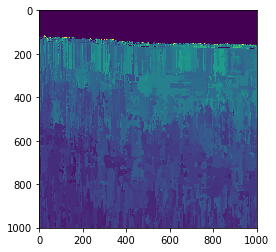

In [8]:
plt.imshow(line.T)

In [9]:
fpeak = pd.DataFrame(line.T)[pd.DataFrame(line.T).columns[::10]].reset_index()
fpeak_names = fpeak[fpeak.columns[:52]].copy(deep=True)

for col in list(fpeak_names.columns[1:]):
    fpeak_names.rename(columns={col:col+4000}, inplace=True)

fpeak_names.rename(columns={'index':'y'}, inplace=True)

long_fpeak_names = pd.DataFrame(columns=['sample', 'value', 'xline'])
for col in fpeak_names.columns[1:]:
    temp = fpeak_names[['y'] + [col]].copy(deep=True)
    temp['xline'] = str(col)    
    long_fpeak_names = long_fpeak_names.append(temp.rename(columns={col:'value', 'y':'sample'}), sort=False)

long_fpeak_names['xline'] = long_fpeak_names['xline'].apply(lambda x: int(float(x)))

long_fpeak_names.rename(columns={'value':'Fpeak'}, inplace=True)
long_fpeak_names.head()

sample  Fpeak  xline
0      0    0.0   4000
1      1    0.0   4000
2      2    0.0   4000
3      3    0.0   4000
4      4    0.0   4000

### Join with picks:

In [10]:
picks = pd.read_csv('picks_Vemund.csv')
pivoted_picks = picks.pivot_table(index='y', values='x', columns='xline').fillna(method='ffill').fillna(method='bfill')
test = pivoted_picks.reset_index()

long_df = pd.DataFrame(columns=['sample', 'value', 'xline'])
for col in test.columns[1:]:
    temp = test[['y'] + [col]].copy(deep=True)
    temp['xline'] = str(col)    
    long_df = long_df.append(temp.rename(columns={col:'value', 'y':'sample'}), sort=False)
    
long_df['xline'] = long_df['xline'].apply(lambda x: int(float(x)))

long_df.rename(columns={'value':'Fmax_pick'}, inplace=True)
long_df.head()

xline  sample  Fmax_pick  xline
0         1.0  84.947599   4000
1         2.0  84.942648   4000
2         3.0  84.937697   4000
3         4.0  84.932745   4000
4         5.0  84.927794   4000

### Merge:

In [11]:
merged_dataset = long_fpeak_names.merge(long_df, left_on=['xline', 'sample'], right_on=['xline', 'sample'])
merged_dataset.head()

sample  Fpeak  xline  Fmax_pick
0      1    0.0   4000  84.947599
1      2    0.0   4000  84.942648
2      3    0.0   4000  84.937697
3      4    0.0   4000  84.932745
4      5    0.0   4000  84.927794

In [13]:
merged_dataset

sample  Fpeak  xline  Fmax_pick
0          1    0.0   4000  84.947599
1          2    0.0   4000  84.942648
2          3    0.0   4000  84.937697
3          4    0.0   4000  84.932745
4          5    0.0   4000  84.927794
...      ...    ...    ...        ...
49895    994    4.0   4500  26.559383
49896    995    4.0   4500  26.559383
49897    996   10.0   4500  26.559383
49898    997   10.0   4500  26.559383
49899    998   10.0   4500  26.559383

[49900 rows x 4 columns]

## Get average amp data

In [12]:
display(get_input)

SelectFilesButton(description='Files Selected', icon='check-square-o', style=ButtonStyle(button_color='lightgr…

In [14]:
seismic_segy = check_and_read_input(get_input.files[0])

 
Loaded file:  C:/Users/hildeha/Dev/Hackathon 2019/FORCE_2019/100_Poseidon3D_FullStack_Sub2.segy 

--- Inlines:
  --- Number of inlines:  126 
  --- Inline range:  2300 - 2425
 
--- Xlines:
  --- Number of xlines:  1001 
  --- Xline range:  4000 - 5000
 
--- Time/Depth samples:
  --- Number of Time/Depth samples:  1001 
  --- Time/Depth range:  0.0 - 4000.0 
  --- Time/Depth step:  4.0


In [15]:
seismic_segy.ilines

array([2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310,
       2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321,
       2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332,
       2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343,
       2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354,
       2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365,
       2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376,
       2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387,
       2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398,
       2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409,
       2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420,
       2421, 2422, 2423, 2424, 2425], dtype=int32)

In [16]:
line = seismic_segy.iline[2362]

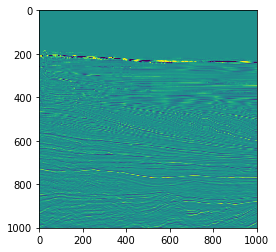

In [17]:
plt.imshow(line.T)

In [18]:
amp = pd.DataFrame(line.T)[pd.DataFrame(line.T).columns[::10]].reset_index()
amp_des = amp[fpeak.columns[:52]].copy(deep=True)

amp_avg = amp_des.copy(deep=True)

for col in amp_avg.columns[1:]:
    amp_avg[col] = amp_des[amp_des.columns[1:]].rolling(125, center=True).mean()[col]

In [19]:
amp_avg.head()

index   0  10  20  30  40  50  60  70  80  ...  410  420  430  440  450  \
0      0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1      1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
2      2 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
3      3 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
4      4 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   

   460  470  480  490  500  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  

[5 rows x 52 columns]

In [20]:
for col in list(amp_avg.columns[1:]):
    amp_avg.rename(columns={col:col+4000}, inplace=True)

amp_avg.rename(columns={'index':'y'}, inplace=True)

long_amp_avg = pd.DataFrame(columns=['sample', 'value', 'xline'])
for col in amp_avg.columns[1:]:
    temp = amp_avg[['y'] + [col]].copy(deep=True)
    temp['xline'] = str(col)    
    long_amp_avg = long_amp_avg.append(temp.rename(columns={col:'value', 'y':'sample'}), sort=False)

long_amp_avg['xline'] = long_amp_avg['xline'].apply(lambda x: int(float(x)))

long_amp_avg.rename(columns={'value':'Avg_amp'}, inplace=True)
long_amp_avg.head()

sample  Avg_amp  xline
0      0      NaN   4000
1      1      NaN   4000
2      2      NaN   4000
3      3      NaN   4000
4      4      NaN   4000

In [21]:
all_merged_dataset = merged_dataset.merge(long_amp_avg, left_on=['xline', 'sample'], right_on=['xline', 'sample'])
all_merged_dataset.head()

sample  Fpeak  xline  Fmax_pick  Avg_amp
0      1    0.0   4000  84.947599      NaN
1      2    0.0   4000  84.942648      NaN
2      3    0.0   4000  84.937697      NaN
3      4    0.0   4000  84.932745      NaN
4      5    0.0   4000  84.927794      NaN

In [22]:
all_merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49900 entries, 0 to 49899
Data columns (total 5 columns):
sample       49900 non-null object
Fpeak        49900 non-null float32
xline        49900 non-null int64
Fmax_pick    49900 non-null float64
Avg_amp      43850 non-null float64
dtypes: float32(1), float64(2), int64(1), object(1)
memory usage: 2.1+ MB


In [23]:
all_merged_dataset.to_csv('training.csv')